# Module - 3 

# Logistic Regression

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('demo1.csv')

In [4]:
df = data.dropna()

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2,2021-08-08T02:41:28.900Z,35.943667,-117.728167,0.42,0.56,ml,10.0,106.0,0.063260,0.16,...,2021-08-08T02:44:57.423Z,"16km E of Little Lake, CA",earthquake,0.35,1.41,0.122,4.0,automatic,ci,ci
5,2021-08-08T02:13:55.060Z,35.776833,-117.586667,7.88,1.04,ml,17.0,129.0,0.039810,0.17,...,2021-08-08T02:17:31.376Z,"16km W of Searles Valley, CA",earthquake,0.38,0.77,0.156,12.0,automatic,ci,ci
7,2021-08-08T01:57:36.060Z,33.680500,-116.730500,14.30,0.80,ml,32.0,50.0,0.033480,0.15,...,2021-08-08T02:01:09.832Z,"7km S of Idyllwild, CA",earthquake,0.28,0.39,0.117,20.0,automatic,ci,ci
10,2021-08-08T01:49:10.870Z,33.154000,-116.389167,-0.17,0.60,ml,14.0,189.0,0.384600,0.26,...,2021-08-08T01:52:50.681Z,"11km S of Borrego Springs, CA",earthquake,1.84,31.61,0.205,3.0,automatic,ci,ci
12,2021-08-08T01:34:18.050Z,38.764332,-122.710671,1.56,0.86,md,10.0,116.0,0.009697,0.04,...,2021-08-08T01:35:55.520Z,"2km SW of Anderson Springs, CA",earthquake,0.44,0.30,0.160,4.0,automatic,nc,nc


In [6]:
del df['time']
del df['updated']
del df['place']
del df['net']
del df['magSource']
del df['type']
del df['id']

In [7]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'status', 'locationSource'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['magType','status', 'locationSource']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [9]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='status', axis=1)
#Response variable
y = df.loc[:,'status']  

In [10]:
'''We'll use a test size of 20%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  5619
Number of test dataset:  1405
Total number of dataset:  7024


In [11]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))

print("")
cm1=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.84      0.58      0.69       130
           1       0.96      0.99      0.97      1275

    accuracy                           0.95      1405
   macro avg       0.90      0.79      0.83      1405
weighted avg       0.95      0.95      0.95      1405


Confusion Matrix result of Logistic Regression is:
 [[  76   54]
 [  15 1260]]

Sensitivity :  0.5846153846153846

Specificity :  0.9882352941176471

Cross validation test results of accuracy:
[0.93807829 0.94021352 0.96370107 0.94946619 0.92378917]

Accuracy result of Logistic Regression is: 94.30496497044541


In [13]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Earth Quake",fontsize=15)
    plt.legend(b,data,fontsize=9)

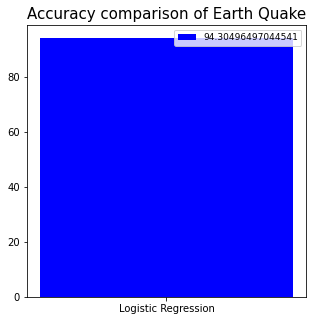

In [14]:
graph()

In [15]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 76
True Negative : 54
False Positive : 15
False Negative : 1260

True Positive Rate : 0.05688622754491018
True Negative Rate : 0.782608695652174
False Positive Rate : 0.21739130434782608
False Negative Rate : 0.9431137724550899

Positive Predictive Value : 0.8351648351648352
Negative predictive value : 0.0410958904109589


Confusion matrix-Logistic_Regression:
[[  76   54]
 [  15 1260]]


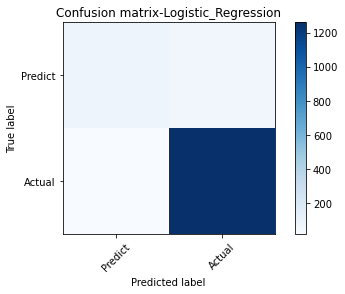

In [16]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Logistic_Regression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic_Regression:')
print(cm1)
plot_confusion_matrix(cm1)